Based on aspects of building location and construction, your goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.

### Data Description

We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

- 1 represents low damage
- 2 represents a medium amount of damage
- 3 represents almost complete destruction


| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| geo_level_1_id, geo_level_2_id, geo_level_3_id|geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.	|
|count_floors_pre_eq |number of floors in the building before the earthquake	|
|age |	age of the building in years|
|area_percentage |	normalized area of the building footprint|
|height_percentage |normalized height of the building footprint	|
|land_surface_condition |surface condition of the land where the building was built. Possible values: n, o, t.	|
|foundation_type |type of foundation used while building. Possible values: h, i, r, u, w	|
|roof_type |type of roof used while building. Possible values: n, q, x	|
|ground_floor_type |type of the ground floor. Possible values: f, m, v, x, z.	|
|other_floor_type |type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.	|
|position |	position of the building. Possible values: j, o, s, t.|
|plan_configuration |building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.	|
|has_superstructure_adobe_mud |	flag variable that indicates if the superstructure was made of Adobe/Mud.|
|has_superstructure_mud_mortar_stone |flag variable that indicates if the superstructure was made of Mud Mortar - Stone.|
|has_superstructure_stone_flag |flag variable that indicates if the superstructure was made of Stone.	|
| |	|
| |	|
| |	|

### Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.2)

# from sklearn.neural_network import MLPClassifier, MLPRegressor
# from sklearn.utils import shuffle

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential, save_model
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
# from tensorflow.keras.optimizers import Adam

import keras
from keras.models import save_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from keras.optimizers import Adam, Adagrad, RMSprop, SGD
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)
tf.random.set_seed(0)

### Data Exploration

In [2]:
df = pd.read_csv("quake.csv")

In [3]:
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [5]:
df.describe(include='all')

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601,260601,260601,260601,260601,260601,260601,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,3,5,4,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,r,n,f,q,s,d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216757,219196,182842,209619,165282,202090,250072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,NaN,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,NaN,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [6]:
df.shape

(260601, 40)

In [7]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_u

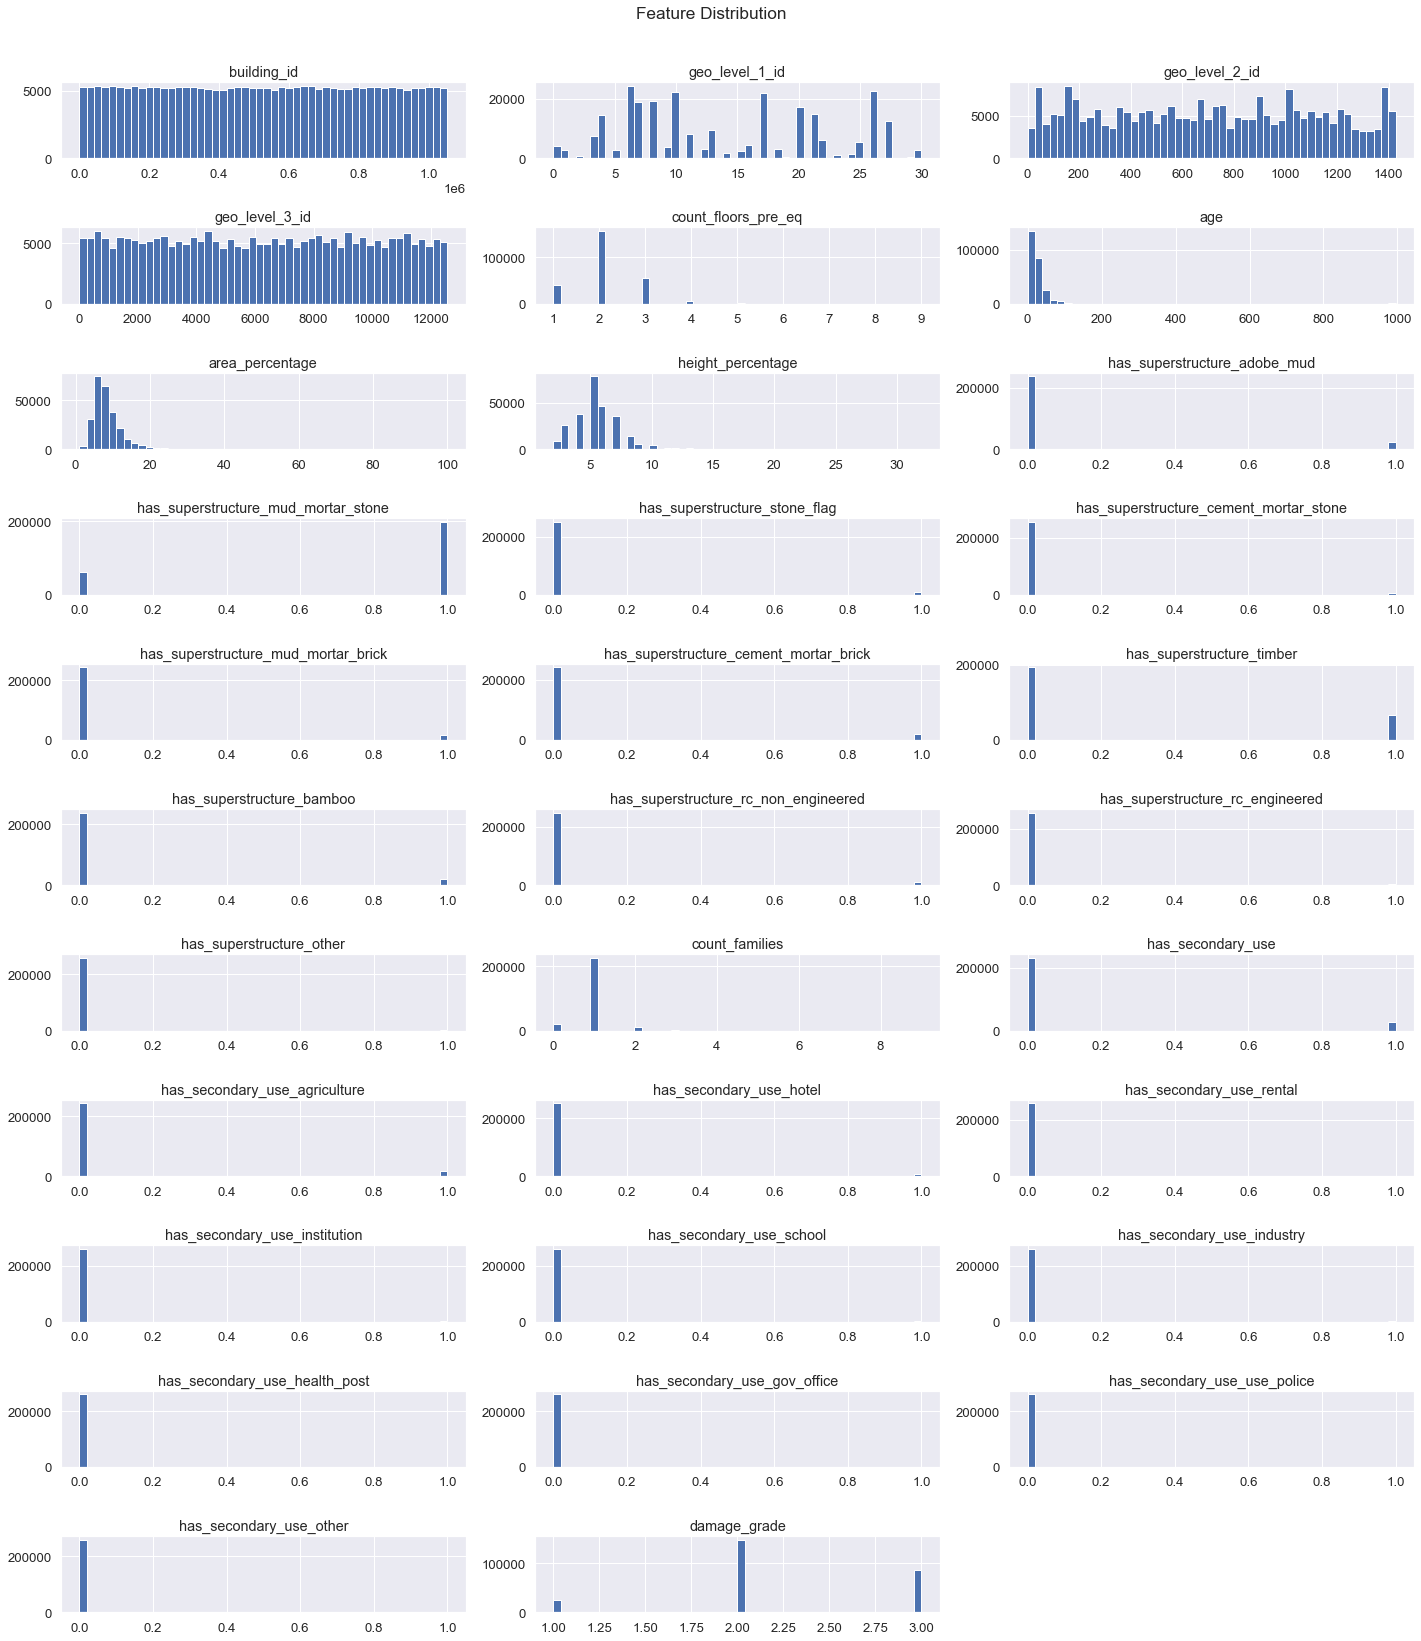

In [8]:
df.hist(bins=50, figsize=(20,30), layout=(15,3))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

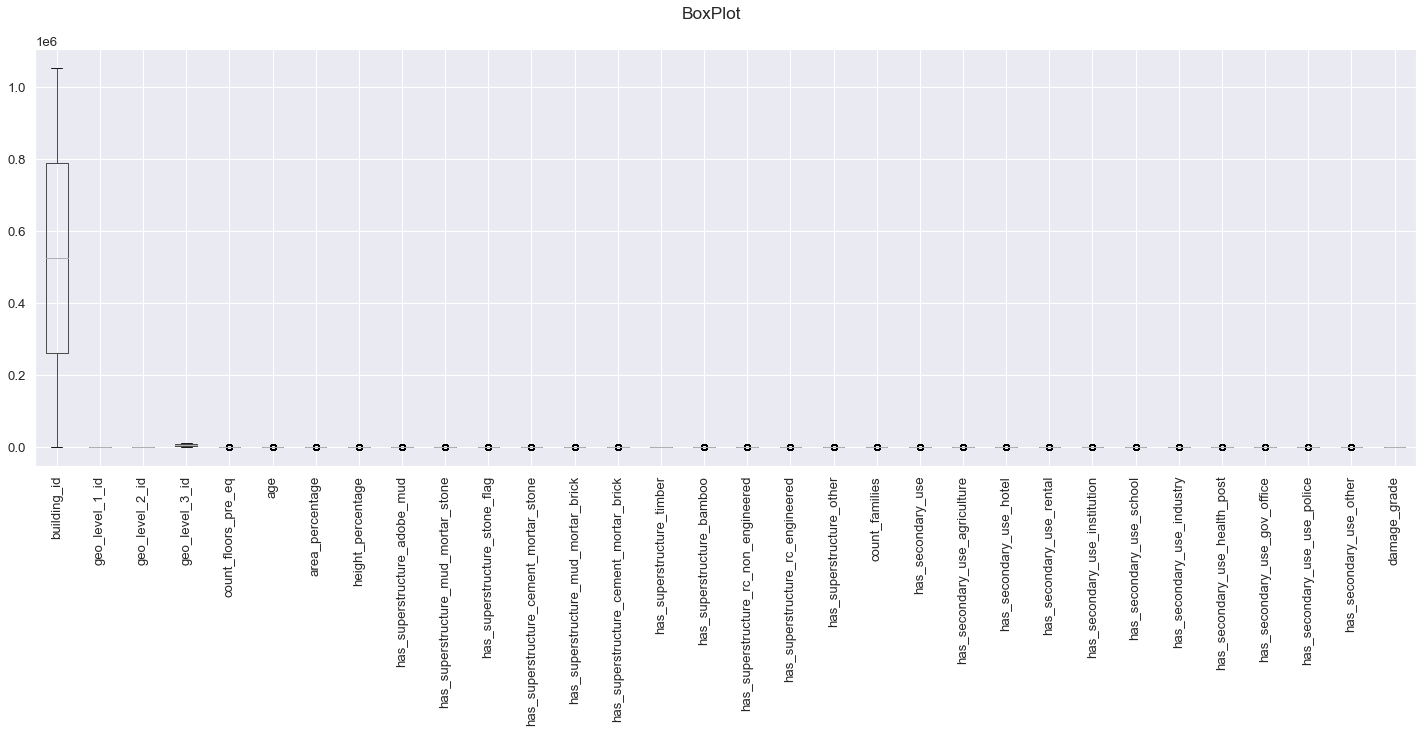

In [9]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Data Preprocessing

### Drop features

In [10]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_u

In [11]:
df.drop(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'land_surface_condition', 'foundation_type', 
         'roof_type', 'ground_floor_type', 'other_floor_type','position', 'plan_configuration',
         'legal_ownership_status','has_secondary_use', 'has_secondary_use_agriculture', 
         'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 
         'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 
         'has_secondary_use_gov_office','has_secondary_use_use_police', 'has_secondary_use_other'],axis=1, inplace=True)

In [12]:
df.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,damage_grade
0,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,3
1,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,2
2,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,3
3,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,2
4,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,3


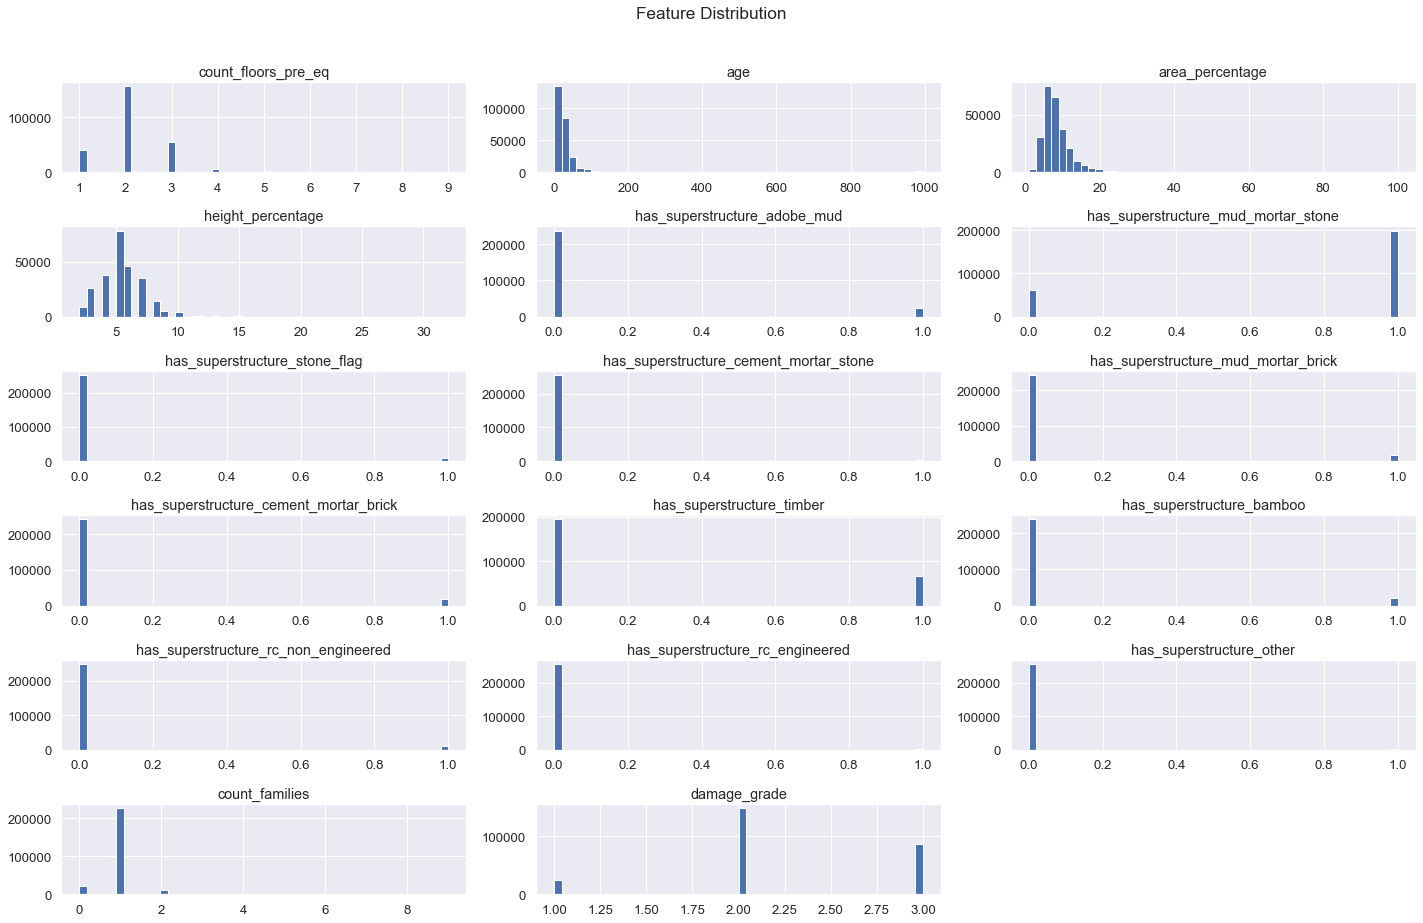

In [13]:
df.hist(bins=50, figsize=(20,30), layout=(15,3))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

In [14]:
#df.to_csv("quaketrain.csv",index=False)

### Treat Duplicate Values

In [15]:
df.duplicated(keep='first').sum()

180806

In [16]:
df[df.duplicated(keep=False)]

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,damage_grade
0,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,3
1,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,2
2,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,3
3,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,2
4,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260595,2,20,8,5,0,1,0,0,0,0,0,0,0,0,0,1,3
260596,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,2
260597,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,3
260598,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,3


In [17]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [18]:
df

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,damage_grade
0,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,3
1,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,2
2,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,3
3,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,2
4,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79790,2,45,17,5,0,1,0,0,0,0,1,0,0,0,0,1,2
79791,3,35,17,7,0,0,0,0,0,1,0,0,0,0,0,1,2
79792,3,15,11,11,0,0,0,0,0,0,0,0,1,0,0,1,1
79793,6,0,13,12,0,0,0,0,1,0,0,0,0,0,0,1,2


In [19]:
#df.to_csv("quaketrain.csv",index=False)

### Train Test Split

In [20]:
df = pd.read_csv("quaketrain.csv")

In [21]:
df.shape

(79795, 17)

In [22]:
X = df.iloc[:,0:16]
y = df.iloc[:,16]

In [23]:
X.values, y.values

(array([[ 2, 30,  6, ...,  0,  0,  1],
        [ 2, 10,  8, ...,  0,  0,  1],
        [ 2, 10,  5, ...,  0,  0,  1],
        ...,
        [ 3, 15, 11, ...,  0,  0,  1],
        [ 6,  0, 13, ...,  0,  0,  1],
        [ 3, 10,  7, ...,  0,  0,  3]], dtype=int64),
 array([3, 2, 3, ..., 1, 2, 3], dtype=int64))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63836, 16), (15959, 16), (63836,), (15959,))

### Treat Imbalance Data

In [26]:
y.value_counts()

2    42663
3    24502
1    12630
Name: damage_grade, dtype: int64

In [27]:
ros = RandomUnderSampler(sampling_strategy='auto',random_state=0)

In [28]:
new_X, new_y = ros.fit_resample(X, y)

In [29]:
new_y.value_counts()

3    12630
2    12630
1    12630
Name: damage_grade, dtype: int64

In [30]:
new_X

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families
0,2,0,8,6,0,0,0,0,0,1,1,0,0,0,0,1
1,1,0,13,4,0,0,0,0,0,1,0,0,0,0,0,1
2,2,0,9,8,0,1,0,0,0,0,0,0,0,0,0,1
3,1,5,11,3,0,0,0,0,0,0,0,0,1,0,0,2
4,1,0,15,3,0,1,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37885,1,25,11,3,0,0,0,0,1,0,0,0,0,0,0,1
37886,1,20,43,5,0,1,0,0,0,0,0,0,0,0,0,1
37887,2,30,17,8,0,1,0,0,0,0,0,0,0,0,0,1
37888,3,50,13,8,1,0,0,0,0,0,0,0,0,0,0,1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(new_X.values, new_y.values, test_size=0.2, random_state=0)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30312, 16), (7578, 16), (30312,), (7578,))

### Feature Scaling (If not using Batch Normalization)

In [33]:
X_train

array([[ 2, 10, 11, ...,  0,  0,  1],
       [ 3, 40, 17, ...,  0,  0,  1],
       [ 2, 15,  8, ...,  0,  0,  1],
       ...,
       [ 1, 35,  8, ...,  0,  0,  1],
       [ 2, 10,  8, ...,  0,  0,  1],
       [ 1,  5,  7, ...,  1,  0,  0]], dtype=int64)

In [34]:
scaler = MinMaxScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)

In [36]:
X_test_scaled = scaler.transform(X_test)

In [37]:
X_train_scaled

array([[0.125     , 0.01005025, 0.1010101 , ..., 0.        , 0.        ,
        0.11111111],
       [0.25      , 0.04020101, 0.16161616, ..., 0.        , 0.        ,
        0.11111111],
       [0.125     , 0.01507538, 0.07070707, ..., 0.        , 0.        ,
        0.11111111],
       ...,
       [0.        , 0.03517588, 0.07070707, ..., 0.        , 0.        ,
        0.11111111],
       [0.125     , 0.01005025, 0.07070707, ..., 0.        , 0.        ,
        0.11111111],
       [0.        , 0.00502513, 0.06060606, ..., 1.        , 0.        ,
        0.        ]])

In [38]:
X_test_scaled

array([[0.        , 0.02512563, 0.03030303, ..., 0.        , 0.        ,
        0.11111111],
       [0.125     , 0.03015075, 0.06060606, ..., 0.        , 0.        ,
        0.11111111],
       [0.        , 0.        , 0.03030303, ..., 0.        , 1.        ,
        0.11111111],
       ...,
       [0.125     , 0.05025126, 0.06060606, ..., 0.        , 0.        ,
        0.11111111],
       [0.        , 0.0201005 , 0.09090909, ..., 0.        , 0.        ,
        0.11111111],
       [0.        , 0.01005025, 0.16161616, ..., 0.        , 0.        ,
        0.11111111]])

In [39]:
len(X_train_scaled)

30312

### Model Training

### Using DNN

In [40]:
model = Sequential()
model.add(Dense(units=32,activation='relu',input_dim=16))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(units=32,activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(units=4,activation='softmax'))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                544       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1

In [42]:
checkpointcb = keras.callbacks.ModelCheckpoint("BestModel.h5",save_best_only=True)

In [43]:
earlystoppingcb = keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [44]:
#'optimizer': 'RMSprop', 'epochs': 80, 'batch_size': 200

In [45]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [46]:
model_history = model.fit(X_train_scaled, y_train,batch_size=200,epochs=80,
                          validation_split=0.2, verbose=2, callbacks=[checkpointcb,earlystoppingcb])

Epoch 1/80
122/122 - 0s - loss: 1.8091 - accuracy: 0.3863 - val_loss: 1.3915 - val_accuracy: 0.4275
Epoch 2/80
122/122 - 0s - loss: 1.3670 - accuracy: 0.4763 - val_loss: 1.1832 - val_accuracy: 0.5252
Epoch 3/80
122/122 - 0s - loss: 1.1574 - accuracy: 0.5018 - val_loss: 1.0514 - val_accuracy: 0.5374
Epoch 4/80
122/122 - 0s - loss: 1.0521 - accuracy: 0.5149 - val_loss: 0.9873 - val_accuracy: 0.5365
Epoch 5/80
122/122 - 0s - loss: 0.9988 - accuracy: 0.5236 - val_loss: 0.9570 - val_accuracy: 0.5375
Epoch 6/80
122/122 - 0s - loss: 0.9674 - accuracy: 0.5281 - val_loss: 0.9401 - val_accuracy: 0.5407
Epoch 7/80
122/122 - 0s - loss: 0.9524 - accuracy: 0.5289 - val_loss: 0.9275 - val_accuracy: 0.5444
Epoch 8/80
122/122 - 0s - loss: 0.9431 - accuracy: 0.5326 - val_loss: 0.9233 - val_accuracy: 0.5476
Epoch 9/80
122/122 - 0s - loss: 0.9370 - accuracy: 0.5357 - val_loss: 0.9190 - val_accuracy: 0.5453
Epoch 10/80
122/122 - 0s - loss: 0.9318 - accuracy: 0.5392 - val_loss: 0.9151 - val_accuracy: 0.5388

In [47]:
model_history.params

{'verbose': 2, 'epochs': 80, 'steps': 122}

In [48]:
model_history.history

{'loss': [1.8090510368347168,
  1.3670246601104736,
  1.1574081182479858,
  1.0521228313446045,
  0.9988239407539368,
  0.9673885703086853,
  0.9524484872817993,
  0.9430808424949646,
  0.9369664192199707,
  0.9317924380302429,
  0.9280080795288086,
  0.9264525771141052,
  0.924706220626831,
  0.924416720867157,
  0.9221973419189453,
  0.9222187399864197,
  0.9223562479019165,
  0.9213898777961731,
  0.9209879636764526,
  0.920274555683136,
  0.9200798273086548,
  0.9170904159545898,
  0.9171625971794128,
  0.9172533750534058,
  0.9189321994781494,
  0.9179267883300781,
  0.9163010120391846,
  0.9144701361656189,
  0.9145326614379883,
  0.9149430990219116,
  0.9142675399780273,
  0.9140522480010986,
  0.9112807512283325,
  0.9137038588523865,
  0.9132193326950073,
  0.9123745560646057,
  0.912748396396637,
  0.912322998046875,
  0.9119307994842529,
  0.9120261073112488,
  0.9114848971366882,
  0.9123358726501465,
  0.9126853346824646,
  0.9108046293258667,
  0.9116914868354797,
  0.911

In [49]:
pd.DataFrame(model_history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.809051,0.386325,1.391494,0.427511
1,1.367025,0.476308,1.183225,0.525153
2,1.157408,0.501753,1.051416,0.537358
3,1.052123,0.514908,0.987318,0.536533
4,0.998824,0.523609,0.957032,0.537523
...,...,...,...,...
75,0.905504,0.548682,0.894086,0.553191
76,0.904562,0.549920,0.893868,0.552202
77,0.904231,0.551734,0.893030,0.556655
78,0.903539,0.552064,0.894299,0.552367


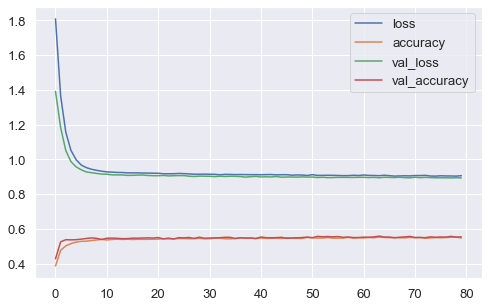

In [50]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()#.set_ylim(0,1)
plt.show()

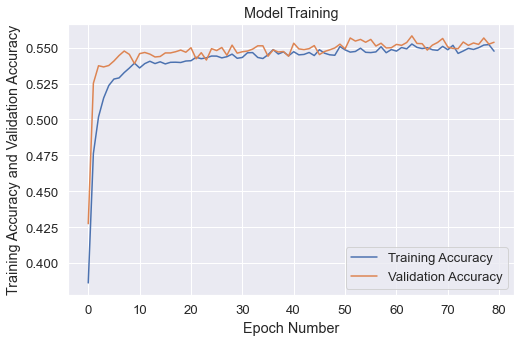

In [51]:
plt.figure(figsize=(8,5))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Training")
plt.ylabel("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch Number")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

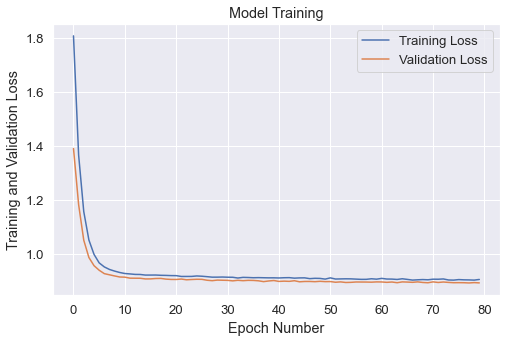

In [52]:
plt.figure(figsize=(8,5))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Training")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

### Model Evaluation

In [53]:
model.get_weights()

[array([[-0.2237183 ,  0.5426378 ,  0.12941691,  0.87320393,  0.63516104,
          0.00878485,  0.09570559, -0.230532  ,  0.78263366, -0.0501625 ,
          0.16329017,  0.6746839 ,  0.07744077, -0.12067761, -0.41305697,
         -0.05147454,  0.29871345,  0.25619555, -0.28930065, -0.05409448,
          0.290359  ,  0.5976123 ,  0.15319355,  0.9092649 ,  0.07113579,
          0.06938501, -0.03614556, -0.05582777, -0.5525326 ,  0.42857942,
          0.54018056, -0.05350848],
        [-2.0005476 ,  0.21617074,  0.07519108, -0.02711674, -0.00824789,
          0.41590005,  0.09615687, -2.2904835 , -0.11657737, -0.94247377,
         -1.161184  , -0.05037766,  0.14777084, -2.589683  ,  0.1210363 ,
         -0.04816083,  0.31896195, -0.00194794,  0.3773984 , -1.3972629 ,
          0.22376427,  0.02869163,  0.0110304 , -0.1125476 ,  0.12046396,
         -1.6518664 , -0.00925795, -3.1790295 ,  0.18673736,  0.16010056,
         -0.06333259, -2.2538311 ],
        [ 0.10605944,  0.011841  ,  0.37

In [54]:
test_loss, test_acc = model.evaluate(X_test_scaled,y_test)

237/237 [==============================] - 0s 780us/step - loss: 0.9015 - accuracy: 0.5457


In [55]:
print("Test Accuracy: {}".format(test_acc))

Test Accuracy: 0.5456584692001343


### Model Prediction

In [56]:
y_pred = model.predict(X_test_scaled)

In [57]:
y_pred

array([[0.00001459, 0.38806215, 0.31825197, 0.2936713 ],
       [0.00000167, 0.11122931, 0.377102  , 0.511667  ],
       [0.00000009, 0.65145   , 0.22186314, 0.12668684],
       ...,
       [0.00000003, 0.02561799, 0.32927683, 0.6451051 ],
       [0.00000012, 0.0879083 , 0.400587  , 0.5115046 ],
       [0.        , 0.72674686, 0.23043361, 0.04281953]], dtype=float32)

In [58]:
y_pred.round(2)

array([[0.  , 0.39, 0.32, 0.29],
       [0.  , 0.11, 0.38, 0.51],
       [0.  , 0.65, 0.22, 0.13],
       ...,
       [0.  , 0.03, 0.33, 0.65],
       [0.  , 0.09, 0.4 , 0.51],
       [0.  , 0.73, 0.23, 0.04]], dtype=float32)

In [59]:
y_class_pred =  model.predict_classes(X_test_scaled)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [60]:
y_class_pred 

array([1, 3, 1, ..., 3, 3, 1], dtype=int64)

In [61]:
y_test

array([2, 3, 1, ..., 3, 2, 1], dtype=int64)

In [62]:
cm = confusion_matrix(y_test,y_class_pred)
cm

array([[1810,  149,  512],
       [ 788,  360, 1423],
       [ 361,  210, 1965]], dtype=int64)

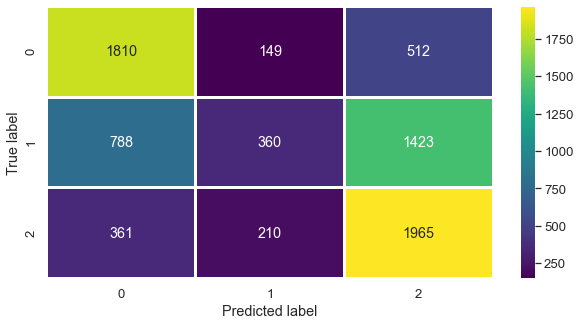

In [63]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [64]:
print(classification_report(y_test,y_class_pred))

              precision    recall  f1-score   support

           1       0.61      0.73      0.67      2471
           2       0.50      0.14      0.22      2571
           3       0.50      0.77      0.61      2536

    accuracy                           0.55      7578
   macro avg       0.54      0.55      0.50      7578
weighted avg       0.54      0.55      0.50      7578



### Save the Model

In [65]:
model.save("quakednn.h5")

### Cross Validation

Build a model (regression or classfier) first

In [66]:
def build_classifier():
    model = Sequential()
    model.add(Dense(units=32,activation='relu',input_dim=16))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(units=32,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(units=4,activation='softmax'))
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])
    return model

In [67]:
model = KerasClassifier(build_fn=build_classifier, batch_size=200, epochs=80)

In [68]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

In [69]:
cv = cross_val_score(estimator=model,X=X_train_scaled, y=y_train, cv=5, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


In [70]:
cv

array([0.55104733, 0.55813956, 0.55278784, 0.56417024, 0.55674696])

In [71]:
cv.mean()

0.5565783858299256

In [72]:
cv.std()

0.004583946503422942

### Model Hyperparameter Tuning

### Create a regressor or classifier function

In [73]:
def build_classifier(optimizer):
    model = Sequential()
    model.add(Dense(units=32,activation='relu',input_dim=16))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(units=32,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(units=4,activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
    return model

In [74]:
model = KerasClassifier(build_fn=build_classifier)

In [75]:
params = {'batch_size':[100,200,500],
          'epochs' : [20,40,60,80],
          'optimizer' : ['Adam', 'RMSprop', 'SGD']
         
         }

### Use RandomSearch CV

In [76]:
randomsearch = RandomizedSearchCV(estimator=model, param_distributions=params,n_iter=30,
                                  scoring='accuracy',n_jobs=-1,cv=5)

In [77]:
randomsearchcv = randomsearch.fit(X_train_scaled, y_train)

Epoch 1/80
304/304 [==============================] - 1s 2ms/step - loss: 1.2643 - accuracy: 0.4488
Epoch 2/80
304/304 [==============================] - 1s 2ms/step - loss: 0.9850 - accuracy: 0.5078
Epoch 3/80
304/304 [==============================] - 1s 2ms/step - loss: 0.9467 - accuracy: 0.5237
Epoch 4/80
304/304 [==============================] - 1s 2ms/step - loss: 0.9363 - accuracy: 0.5306
Epoch 5/80
304/304 [==============================] - 1s 2ms/step - loss: 0.9314 - accuracy: 0.5310
Epoch 6/80
304/304 [==============================] - 0s 2ms/step - loss: 0.9278 - accuracy: 0.5353
Epoch 7/80
304/304 [==============================] - 0s 2ms/step - loss: 0.9275 - accuracy: 0.5352
Epoch 8/80
304/304 [==============================] - 0s 1ms/step - loss: 0.9251 - accuracy: 0.5364
Epoch 9/80
304/304 [==============================] - 0s 2ms/step - loss: 0.9208 - accuracy: 0.5382
Epoch 10/80
304/304 [==============================] - 0s 2ms/step - loss: 0.9220 - accuracy: 0.5408

In [78]:
randomsearchcv.best_params_

{'optimizer': 'RMSprop', 'epochs': 80, 'batch_size': 100}

In [79]:
randomsearchcv.best_score_

0.5589535436043179